In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

In [2]:
df = pd.read_csv('dorothea_train.data', delimiter=' ', names=list(range(6061)))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,118,307,367,478,505,512,807,878,939,1024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,184,284,297,320,375,445,588,658,1108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,87,149,433,704,711,892,988,1056,1070,1234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84,118,279,316,435,505,584,629,849,1029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
um = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=100)
for i in range(len(df.columns)):
    df[i].fillna(df[i].median(), inplace=True)

numeric_data = df
um_result = um.fit_transform(numeric_data)

/home/e/.local/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


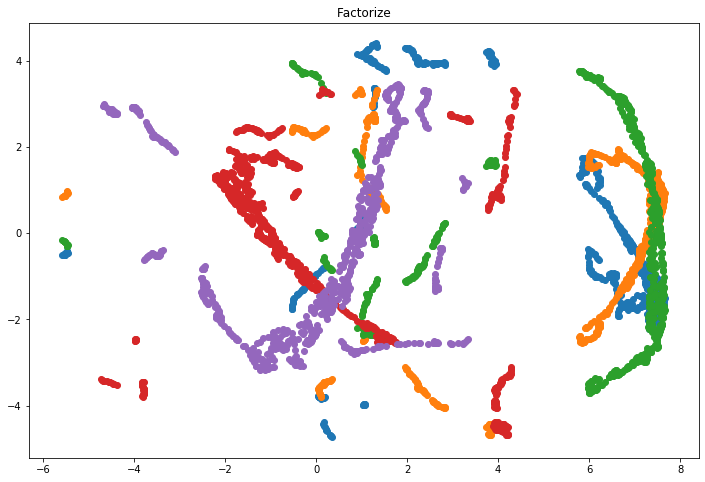

In [4]:
plt.figure(figsize=(12, 8))
plt.title('Factorize')
plt.scatter(um_result[:, 0], um_result[:, 1])
plt.scatter(um_result[:, 0], um_result[:, 2])
plt.scatter(um_result[:, 0], um_result[:, 3])
plt.scatter(um_result[:, 1], um_result[:, 2])
plt.scatter(um_result[:, 2], um_result[:, 4])

In [5]:
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=15)
X=um_result
kpca = kpca.fit(X)
kpca_result = kpca.transform(X)

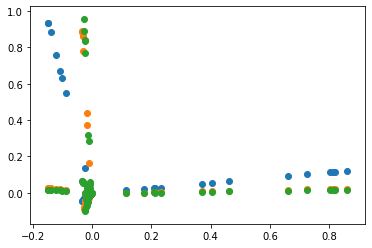

In [7]:
plt.scatter(kpca_result[:, 0], kpca_result[:, 1])
plt.scatter(kpca_result[:, 0], kpca_result[:, 2])
plt.scatter(kpca_result[:, 0], kpca_result[:, 3])
plt.show()

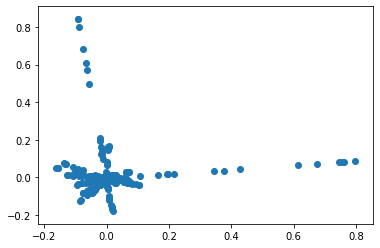

In [8]:
pca = PCA(n_components=2)
X=kpca_result
pca = pca.fit(X)
pca_result = pca.transform(X)
plt.scatter(pca_result[:, 0], pca_result[:, 1])

plt.show()